Calcular

$$\int_0^1g(x)=\sqrt{\arctan(x)}dx$$

**Sumas de Riemann**

La aproximación numérica a la integral se puede elaborar con base en una partición regular,

$$b_0=0$$
$$b_1,b_2,...,b_n=1$$

del intervalo de integración, según la fórmula

$$I=\frac{1}{n}[g(b_1)+...+g(b_n)]$$

donde

$$b_i=\frac{i}{n},\hspace{1cm}i=1,2,...,n$$



In [2]:
#Se quiere calcular mediante sumas de Riemman por la izquierda la integral de sqrt(arctan(x))
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [ ]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)

    plt.plot(x, f(x), color='#C50745')

    # Calcular la suma de Riemann
    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    # Graficar los rectángulos de la suma de Riemann
    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,edgecolor = 'black',facecolor='#6EE1BA')

    # Calcular los intervalos de confianza
    std_dev = np.std(riemanny)
    confidence_interval = 1.96 * std_dev / np.sqrt(n)  # 95% intervalo de confianza

    # Graficar los intervalos de confianza
    plt.fill_between(riemannx, riemanny - confidence_interval, riemanny + confidence_interval, color='#E7A9CD', alpha=0.2, label='95% Intervalo de Confianza')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Suma de Riemann por la izquierda de f(x)')
    plt.figtext(0.1,-0.05, "Suma de Riemann: %.5f " %(riemann_sum), color='b')

    plt.legend()
    plt.savefig('riemann.png')
    plt.show()

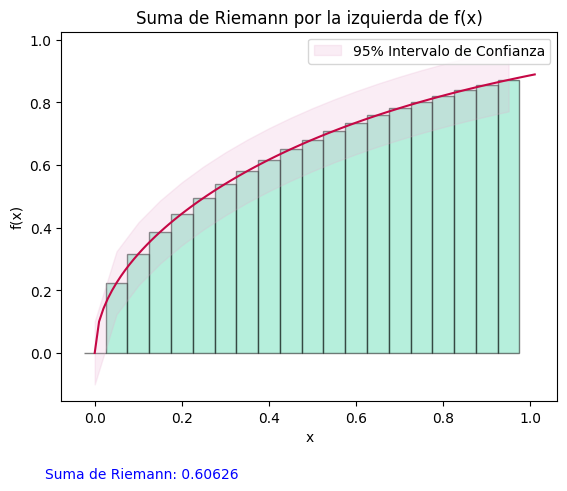

In [ ]:
def f(x):
    return np.sqrt(np.arctan(x))

riemannplot(f, 0, 1.001, 0, 1.001, 20)

**Media muestral**

La aproximación numérica se obtiene de la siguiente expresión:

$$I=\frac{1}{n}[g(x_1)+...+g(x_n)]$$

donde

$$x_i∼U(0,1)$$

los valores de la variable consisten en una muestra de números pseudoaleatorios
uniformes para el intervalo (0, 1).

Rescribimos la integral $I$ como:

$$I=\int_a^b\frac{g(x)}{f_X(x)}f_X(x)dx$$

Donde $f_X(x)$ es cualquier función densidad de distribución tal que $f_X(x)>0$ cuando $g(x)\neq 0$. Entonces:

$$I=E\left[\frac{g(x)}{f_X(x)}\right]$$

donde usaremos por simplicidad

$$
f_X(x) = \left\{
            \begin{array}{ll}
	      \frac{1}{b-a} & \mathrm{si\ } a<x<b \\
        0 & \mathrm{otro\ caso}
            \end{array}
	      \right.\
$$

Asi,

$$I=(b-a)E[g(X)]$$

Un estimador insesgado de esta integral es:

$$\hat{ϴ}=\frac{b-a}{n}\sum_{i=1}^n g(X_i)$$

el cual tiene una varianza:

$$Var(\hat{ϴ})=\frac{1}{n}\left[(b-a)\int_a^b g^2(x)dx-I^2\right]$$

In [ ]:
def Media_muestral(a, b, n):
    # Definir la función y generar n repeticiones
    lista_X = [] # Almacena los valores de X
    lista_g = [] # Almacena los valores de g
    for i in range(n):
        U = rnd.random()
        X = a + U * (b - a)
        g = np.sqrt(np.arctan(X))
        lista_X.append(X)
        lista_g.append(g)

    # Sumar todos los valores de g
    suma_g = sum(lista_g)

    # Calcular la media muestral
    I = ((b-a) / n) * suma_g

    return I

print(f'El valor de la integral es: {Media_muestral(0, 1, 50)}')

El valor de la integral es: 0.6044876282177797


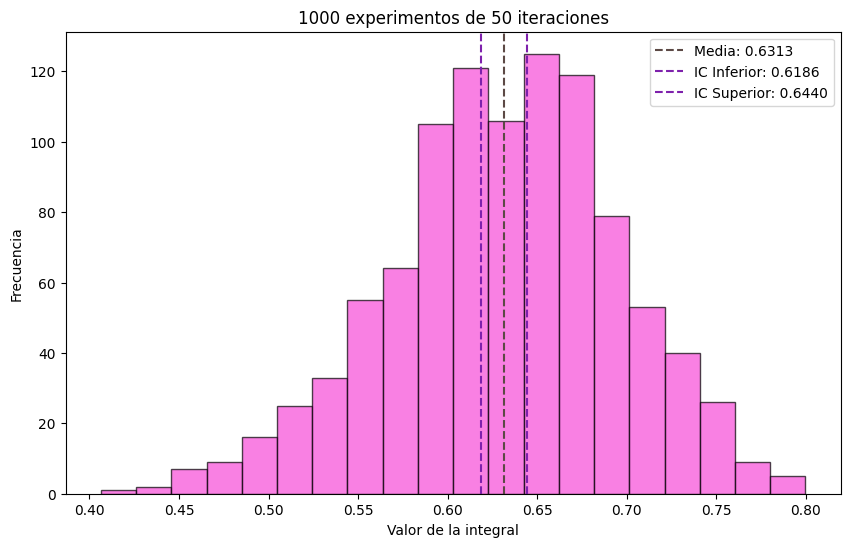

In [ ]:
# Generar el proceso 100 veces
resultados = [Media_muestral(0, 1, 10) for i in range(1000)]

# Calcular la media y el intervalo de confianza
media = np.mean(resultados)
desviacion_estandar = np.std(resultados)
intervalo_confianza = (media - 1.96 * desviacion_estandar / np.sqrt(100),
                       media + 1.96 * desviacion_estandar / np.sqrt(100))

# Graficar
plt.figure(figsize=(10, 6))
plt.hist(resultados, bins=20, alpha=0.7, color='#F74BD8', edgecolor='black')
plt.axvline(x=media, color='#5C4945', linestyle='--', label=f'Media: {media:.4f}')
plt.axvline(x=intervalo_confianza[0], color='#7E21AC', linestyle='--', label=f'IC Inferior: {intervalo_confianza[0]:.4f}')
plt.axvline(x=intervalo_confianza[1], color='#7E21AC', linestyle='--', label=f'IC Superior: {intervalo_confianza[1]:.4f}')
plt.title('1000 experimentos de 50 iteraciones')
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**Acierto y error**

Consiste en interpretar la integral como el área bajo la curva en una región rectangular, en nuestro ejemplo: $\{0\leq x\leq 1\}×\{0\leq g(x)\leq c\}$, para algún valor $c$ que acote la función en todo el intervalo de integración, y
generar $n$ puntos aleatorios $(x,y)$ sobre dicho rectángulo. Luego, la probabilidad de acertar a la región bajo la curva es:

$$p=\frac{\int_a^b g(x)dx}{c(b-a)}=\frac{I}{c(b-a)}$$

El parámetro p puede ser estimado,

$$\hat{p}=\frac{n_a}{n}$$

donde $n_a$ es el número de puntos bajo o sobre la curva, es decir, los aciertos del muestreo.

Y la integral puede ser, a su vez, estimada por:

$$\hat{ϴ}=c(b-a)\frac{n_a}{n}$$

En este caso la varianza es:

$$Var(\hat{ϴ})=\frac{c(b-a)-I}{n}$$

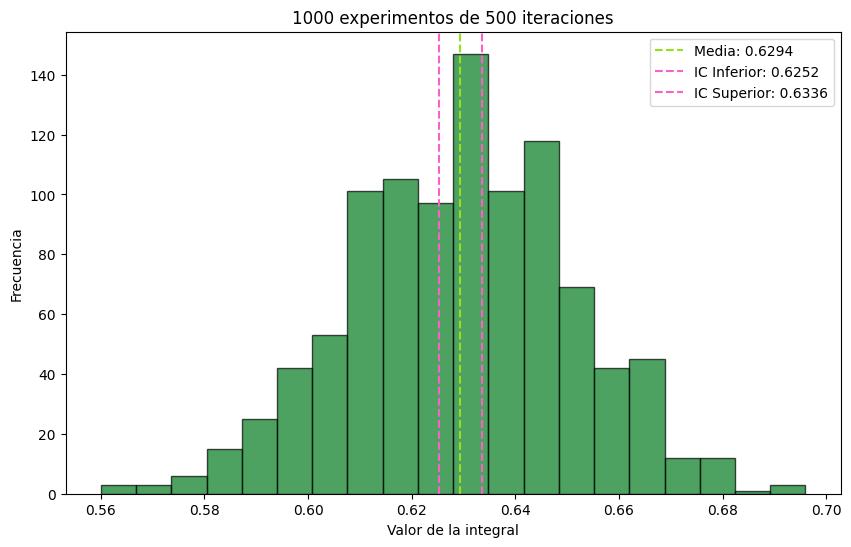

In [8]:
def corridas(N):
  l = []
  exitos = 0
  for i in range(N):
    U1 = rnd.random()
    U2 = rnd.random()
    if U2 <= np.sqrt(np.arctan(U1)):
      exitos += 1
    prob = exitos / (i+1)
    l.append(prob)
  return l[-1]

# Fijamos ahora N=500, esta función nos va agenerar la simulación
def simulacion(M):
  r = []
  for i in range(M):
    R = corridas(500)
    r.append(R)
  return r

# Calcular la media y el intervalo de confianza
resultados = simulacion(1000)
media = np.mean(resultados)
desviacion_estandar = np.std(resultados)
intervalo_confianza = (media - 1.96 * desviacion_estandar / np.sqrt(100),
                       media + 1.96 * desviacion_estandar / np.sqrt(100))

# Graficar
plt.figure(figsize=(10, 6))
plt.hist(resultados, bins=20, alpha=0.7, color='#017B1F', edgecolor='black')
plt.axvline(x=media, color='#94E117', linestyle='--', label=f'Media: {media:.4f}')
plt.axvline(x=intervalo_confianza[0], color='#FC60C7', linestyle='--', label=f'IC Inferior: {intervalo_confianza[0]:.4f}')
plt.axvline(x=intervalo_confianza[1], color='#FC60C7', linestyle='--', label=f'IC Superior: {intervalo_confianza[1]:.4f}')
plt.title('1000 experimentos de 500 iteraciones')
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()